Machine Learning (IE406)

Assignment 9

Krunal Lukhi 201901449

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions


Importing data

In [ ]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Feature Extraction

In [ ]:
X1=np.array(data[['SepalLengthCm','SepalWidthCm']])#'PetalLengthCm','PetalWidthCm']])
X1=X1.reshape(len(X1),2)
X1=X1[0:100,:]
Y=np.array(data['Species'])


for i in range(100):
  if(Y[i]=='Iris-setosa'):
    Y[i]=0
  elif(Y[i]=='Iris-versicolor'):
    Y[i]=1
  else:
    Y[i]=2
Y1=Y[0:100]
Y1=Y1.astype('int')
print(X1.shape)
print(Y1.shape)

(100, 2)
(100,)


Visualization of data

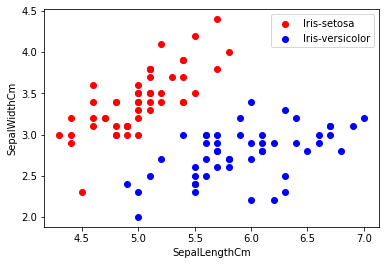

In [ ]:
fig= plt.figure()
ax = fig.add_subplot()
ax.scatter(X1[:50,0],X1[:50,1],color='r')
ax.scatter(X1[50:100,0],X1[50:100,1],color='b')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.legend(['Iris-setosa','Iris-versicolor'])
plt.show()

Feature Normalization

In [ ]:
scaler = StandardScaler() #MinMAxScaler()
X1_train_normal= scaler.fit_transform(X1)
#X_test_normal=scaler.fit_transform(X_test)


Fitting data

In [ ]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X1_train_normal, Y1)


SVC(kernel='linear', random_state=0)

Ploting classification results

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


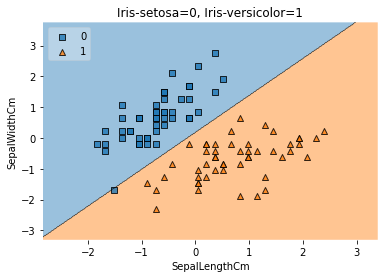

In [ ]:
plot_decision_regions(X1_train_normal, Y1, clf=classifier, legend=2)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
#plt.legend(['Iris-setosa','Iris-versicolor'])
plt.title('Iris-setosa=0, Iris-versicolor=1')
plt.show()

Splitting data into 3 parts

In [ ]:
X_train,X_test, Y_train, Y_test= train_test_split(X1,Y1,test_size=0.2, random_state=42)
X_test,X_val, Y_test, Y_val= train_test_split(X_test,Y_test,test_size=0.5, random_state=42)

Feature Normalization

In [ ]:
scaler = StandardScaler() #MinMAxScaler()
X_train_normal= scaler.fit_transform(X_train)
X_test_normal=scaler.fit_transform(X_test)
X_val_normal=scaler.fit_transform(X_val)

Utilization of Validation Set

In [ ]:
C_best=0
C_cur=1;
acr_best=0
for i in range(-1,5,1):

  C_cur=pow(10,i)
  clf = SVC(kernel='linear',C=C_cur, random_state=0)
  clf.fit(X_train_normal, Y_train)
  acr=clf.score(X_val_normal,Y_val)
  if acr_best<acr:
    acr_best=acr
    C_best=C_cur

clf = SVC(kernel='linear',C=C_best, random_state=0)
clf.fit(X_train_normal, Y_train)
acr=clf.score(X_test_normal,Y_test)
print("Accuracy: ",acr*100,"%")

Accuracy:  90.0 %
